# Learning Graph Cellular Automata

This notebook is based on the following paper

> Grattarola, Daniele, Lorenzo Livi, and Cesare Alippi. *Learning Graph Cellular Automata*. In Advances in Neural Information Processing Systems, 34:20983–94. Curran Associates, Inc., 2021.

... and code

> [https://github.com/danielegrattarola/GNCA](https://github.com/danielegrattarola/GNCA)

Note: unless otherwise noted, quotations and figures are taken from the cited paper.

## Setup

In [1]:
import warnings

warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import animation
from spektral.layers.ops import sp_matrix_to_sp_tensor
from spektral.data import DisjointLoader

from boids.forward import forward
from modules.boids import Boids, make_dataset
from modules.ca import VoronoiCA
from boids.run_boids import boids_main
from voronoi.run_voronoi import voronoi_main

%matplotlib inline

## Graph Cellular Automata

"Graph cellular automatas (GCA) are a generalised version of lattice-based cellular automatas (CA), in which the underlying lattice is replaced by an arbitrary graph. [...] The original CA formalism allows for transition rules that can treat the different neighbours of a cell differently, according to their position with respect to the cell. [...] In GCA a similar anisotropic behaviour can be obtained by uniquely enumerating the neighbours of each cell and adapting the transition rule accordingly. More generally, we can assign to each edge $(i, j) \in E$ an attribute $e_{ij} \in R^{d_e}$ encoding"

<center><img src="images/gca.png" width=700 /></center>

> Topa, P., Kuźniar, M., Dzwinel, W. *Graph of Cellular Automata as a Metaphor of Fusarium Graminearum Growth Implemented in GPGPU CUDA Computational Environment*. In Parallel Processing and Applied Mathematics. PPAM 2011. Lecture Notes in Computer Science, vol 7204.

## Graph Neural Cellular Automata

<center><img src="images/gnca.png" width=700 /></center>

## Example 1: Voronoi GCA

"$\mathcal{G}$ is given by the Delaunay triangulation of a random 2D point cloud. The cells of this type of GCA are the cells of the Voronoi tessellation of the points. Let $S = \{0, 1\}$ be a binary state space, $\rho_i = \frac{1}{|\mathcal{N} (i)|} \sum_{j \in \mathcal{N} (i)} \textbf{s}_j$ the neighbourhood density of a node, and $\kappa \in [0, 1]$ a threshold, then the GCA rule is given by"

$$
\tau \textbf(s_i) =
    \begin{cases}
      \textbf{s}_i, & \text{if}~\rho_i \le \kappa \\
      1 - \textbf{s}_i, & \text{if}~\rho_i > \kappa
    \end{cases}
$$

Example transition:

<center><img src="images/voronoi.png" width=500 centered /></center>

  0%|          | 0/100 [00:00<?, ?it/s]

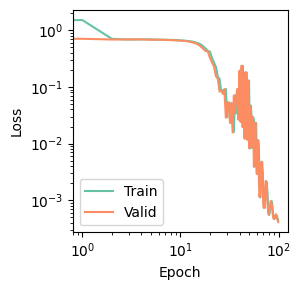

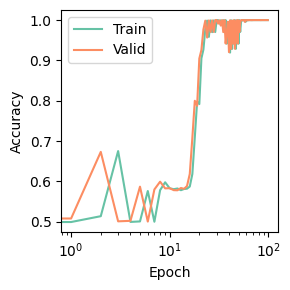

In [3]:
model = voronoi_main()

In [4]:
# Init
fig = plt.figure()
n_cells = 2000
mu = 0.0
sigma = 0.50
steps = 100

# Run
initial_state = np.random.randint(0, 2, n_cells)
gca = VoronoiCA(n_cells, mu=mu, sigma=sigma)
history = gca.evolve(initial_state, steps=steps)

# Animation
def update_plot(n):
    gca.plot(history[n], fig)

anim = animation.FuncAnimation(fig, update_plot, frames=steps, repeat=True)
anim.save('images/voronoi_ca_big.gif', writer='pillow', fps=10)

plt.close()

In [5]:
# Init
a = sp_matrix_to_sp_tensor(gca.graph.a)
state = initial_state.reshape((1, -1, 1)).astype('f4')
next_state = model([state, a])

# Run
results = []
results.append(np.array(state).reshape(-1))
results.append(np.array(next_state).reshape(-1))

for i in range(steps-1):
    next_state = model([next_state, a])
    results.append(np.array(next_state).reshape(-1))

# Animation
gca.fig = None
fig2 = plt.figure()

def update_plot_gnca(n):
    gca.plot((results[n] > 0.5).astype(int), fig2)

anim = animation.FuncAnimation(fig2, update_plot_gnca, frames=steps, repeat=True)
anim.save('images/voronoi_gca_big.gif', writer='pillow', fps=10)

plt.close()

<h3> Example</h3><br/>
GCA: <img src="images/voronoi_ca.gif" width="500" align="center">
GNCA: <img src="images/voronoi_gca.gif" width="500" align="center">

<h3> Example with bigger data</h3><br/>
GCA: <img src="images/voronoi_ca_big.gif" width="500" align="center">
GNCA: <img src="images/voronoi_gca_big.gif" width="500" align="center">

## Example 2: Boids

"Our second experiment consists of learning a GCA with continuous state space and in which the connectivity between cells changes over time. Specifically, we take a set of cells whose states represent their positions and velocities on a plane, $\mathcal{G}$ is a dynamic graph given by a fixed-radius neighbourhood of each cell at each step, and the state of the cells is updated with the Boids algorithm."

<center><img src="images/boids_alg.png" width=400/></center>

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

Epoch 1/100
3000/3000 [==============================] - 160s 53ms/step - loss: 7.6275e-06 - val_loss: 1.4236e-06 - lr: 0.0010
Epoch 2/100
3000/3000 [==============================] - 154s 51ms/step - loss: 1.1905e-06 - val_loss: 1.0039e-06 - lr: 0.0010
Epoch 3/100
3000/3000 [==============================] - 145s 48ms/step - loss: 1.0998e-06 - val_loss: 9.5112e-07 - lr: 0.0010
Epoch 4/100
3000/3000 [==============================] - 147s 49ms/step - loss: 1.0224e-06 - val_loss: 9.9766e-07 - lr: 0.0010
Epoch 5/100
3000/3000 [==============================] - 147s 49ms/step - loss: 9.8247e-07 - val_loss: 9.4840e-07 - lr: 0.0010
Epoch 6/100
3000/3000 [==============================] - 148s 49ms/step - loss: 9.5324e-07 - val_loss: 9.6410e-07 - lr: 0.0010
Epoch 7/100
3000/3000 [==============================] - 152s 51ms/step - loss: 9.3347e-07 - val_loss: 1.0707e-06 - lr: 0.0010
Epoch 8/100
3000/3000 [==============================] - 155s 52ms/step - loss: 9.2217e-07 - val_loss: 9.9852e-

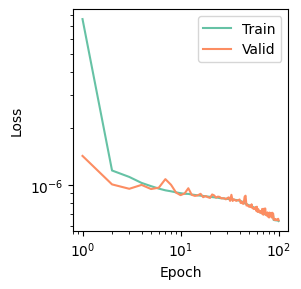

In [6]:
model = boids_main()

In [7]:
# Init
boids = Boids(
    min_speed=0.0001,
    max_speed=0.01,
    max_force=0.1,
    max_turn=5,
    perception=0.25,
    crowding=0.025,
    n_boids=100,
    dt=1,
    canvas_scale=1,
    boundary_size_pctg=0.2,
    wrap=False
)

# Run
history = boids.generate_trajectory(1000)

# Animation
fig, ax = plt.subplots()
scat = ax.scatter([], [], marker='.', edgecolor='k', lw=0.5)

def init():
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.set_aspect('equal')
    ax.set_xticks([])
    ax.set_yticks([])
    return scat,

def update(n):
    scat.set_offsets(history['positions'][n])
    return scat,

anim = animation.FuncAnimation(fig, update, frames=len(history['positions']), init_func=init, blit=True)
anim.save('images/boids.gif', writer='pillow', fps=20)

plt.close()

In [8]:
# Init
data_te, boids_te = make_dataset(1, 1000, return_boids=True, n_boids=100, n_jobs=-1)
inputs, x_next = next(iter(DisjointLoader(data_te, node_level=True, epochs=1, shuffle=False)))

# Run
results = []

for _ in range(1000):
    a = boids_te.get_neighbors(x_next[:, :2])
    a = sp_matrix_to_sp_tensor(a)
    inputs = [x_next, a, inputs[-1]]
    x_next = forward(model, *inputs, training=False)
    results.append(x_next[:, :2])

# Animation
fig, ax = plt.subplots()
scat = ax.scatter([], [], marker='.', edgecolor='C1', lw=0.5)

def update(n):
    scat.set_offsets(results[n])
    return scat,

anim = animation.FuncAnimation(fig, update, frames=len(results), init_func=init, blit=True)
anim.save('images/boids_gnca.gif', writer='pillow', fps=20)

plt.close()

  0%|          | 0/1 [00:00<?, ?it/s]

<h3> Example</h3><br/>
GCA: <img src="images/boids.gif" width="500" align="center">
GNCA: <img src="images/boids_gnca.gif" width="500" align="center">

## Possible extension

All presented examples assumed the availability of the CA model and learned in a supervised manner on subsequent steps calculated using the CA model. Our proposal is to extend this model by learning only from a specially designed cost function (without access to the CA model), which is a step towards reinforcement learning.

As an example application of this method, we want to solve the graph coloring problem using GNCA.

<center><img src="images/graph_coloring.png" width=300 /></center>

> A proper vertex coloring of the Petersen graph with 3 colors, the minimum number possible (https://en.wikipedia.org/wiki/Graph_coloring)

The cost function designed for this problem should reflect both the quality of coloring (whether the colors of neighboring vertices are repeated) and the number of colors used (should be minimal).

## Appendix A: Low precision boids

In [3]:
from modules.boids_lp import BoidsLp

# Init
boids = BoidsLp(
    min_speed=0.0001,
    max_speed=0.01,
    max_force=0.1,
    max_turn=5,
    perception=0.25,
    crowding=0.025,
    n_boids=100,
    dt=1,
    canvas_scale=1,
    boundary_size_pctg=0.2,
    wrap=False,
    precision=10
)

# Run
history = boids.generate_trajectory(1000)

# Animation
fig, ax = plt.subplots()
scat = ax.scatter([], [], marker='.', edgecolor='k', lw=0.5)

def init():
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.set_aspect('equal')
    ax.set_xticks([])
    ax.set_yticks([])
    return scat,

def update(n):
    scat.set_offsets(history['positions'][n])
    return scat,

anim = animation.FuncAnimation(fig, update, frames=len(history['positions']), init_func=init, blit=True)
anim.save('images/boids_lp.gif', writer='pillow', fps=20)

plt.close()

<img src="images/boids_lp.gif" width="500" align="center">

## Appendix B: Longer training and clustering metrics

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

Epoch 1/200
3000/3000 [==============================] - 139s 46ms/step - loss: 7.6949e-06 - val_loss: 1.0027e-06 - lr: 0.0010
Epoch 2/200
3000/3000 [==============================] - 140s 47ms/step - loss: 1.1593e-06 - val_loss: 1.0343e-06 - lr: 0.0010
Epoch 3/200
3000/3000 [==============================] - 140s 47ms/step - loss: 1.0751e-06 - val_loss: 1.0078e-06 - lr: 0.0010
Epoch 4/200
3000/3000 [==============================] - 139s 46ms/step - loss: 1.0099e-06 - val_loss: 9.2427e-07 - lr: 0.0010
Epoch 5/200
3000/3000 [==============================] - 219s 73ms/step - loss: 9.7245e-07 - val_loss: 9.5363e-07 - lr: 0.0010
Epoch 6/200
3000/3000 [==============================] - 141s 47ms/step - loss: 9.4858e-07 - val_loss: 1.0916e-06 - lr: 0.0010
Epoch 7/200
3000/3000 [==============================] - 141s 47ms/step - loss: 9.3266e-07 - val_loss: 9.0083e-07 - lr: 0.0010
Epoch 8/200
3000/3000 [==============================] - 143s 48ms/step - loss: 9.2476e-07 - val_loss: 9.0382e-

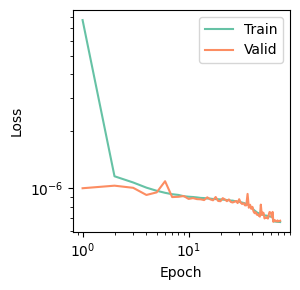

In [3]:
model = boids_main(epochs=200)

In [21]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score


def cluster_and_evaluate(frames):
    silhouette_scores = []
    calinski_harabasz_scores = []
    davies_bouldin_scores = []

    for i, frame in enumerate(frames[100:]):
        dbscan = DBSCAN(eps=0.05)
        labels = dbscan.fit_predict(frame)

        silhouette_scores.append(silhouette_score(frame, labels))
        calinski_harabasz_scores.append(calinski_harabasz_score(frame, labels))
        davies_bouldin_scores.append(davies_bouldin_score(frame, labels))

    mean_silhouette = np.mean(silhouette_scores)
    mean_calinski_harabasz = np.mean(calinski_harabasz_scores)
    mean_davies_bouldin = np.mean(davies_bouldin_scores)

    return mean_silhouette, mean_calinski_harabasz, mean_davies_bouldin


boids = Boids(
    min_speed=0.0001,
    max_speed=0.01,
    max_force=0.1,
    max_turn=5,
    perception=0.25,
    crowding=0.025,
    n_boids=100,
    dt=1,
    canvas_scale=1,
    boundary_size_pctg=0.2,
    wrap=False
)

frames = boids.generate_trajectory(1000)
s, ch, db = cluster_and_evaluate(frames['positions'])

print('Boids:')
print('silhouette_score =', s)
print('calinski_harabasz_score =', ch)
print('davies_bouldin_score =', db)


data_te, boids_te = make_dataset(1, 1000, return_boids=True, n_boids=100, n_jobs=-1)
inputs, x_next = next(iter(DisjointLoader(data_te, node_level=True, epochs=1, shuffle=False)))

frames = []

for _ in range(1000):
    a = boids_te.get_neighbors(x_next[:, :2])
    a = sp_matrix_to_sp_tensor(a)
    inputs = [x_next, a, inputs[-1]]
    x_next = forward(model, *inputs, training=False)
    frames.append(x_next[:, :2])

s, ch, db = cluster_and_evaluate(frames)

print('GNCA:')
print('silhouette_score =', s)
print('calinski_harabasz_score =', ch)
print('davies_bouldin_score =', db)

Boids:
silhouette_score = 0.5498209584114491
calinski_harabasz_score = 281.2058424641826
davies_bouldin_score = 1.3944704118089644


  0%|          | 0/1 [00:00<?, ?it/s]

GNCA:
silhouette_score = 0.8438432
calinski_harabasz_score = 7191.572235218191
davies_bouldin_score = 0.2655331979126458
